<a href="https://colab.research.google.com/github/pablex72/time-series-crop/blob/main/interpolation_spline_transformer_1ccc_de_Spline_Ridge_update_10a_without_normalized_NDVI_train_test_scatter_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading Data

In [ ]:
df = pd.read_csv("/content/s2-r2-2019-2022-correct-2.csv")
df

,Date,NDVI
0,1/26/2019,0.708
1,2/5/2019,0.695
2,3/7/2019,0.251
3,4/6/2019,0.413
4,4/26/2019,0.267
...,...,...
120,10/2/2022,0.090
121,10/17/2022,0.082
122,11/6/2022,0.111
123,11/16/2022,0.147


# Lagging

Predicting the next 'NDVI' value based on the current value, using lag of '-1'.

In [ ]:
# Build the target, the next NDVI value
df['Target'] = df['NDVI'].shift(-1) # Target NDVI will be the next Sample
target_df = df[:-1]
target_df

,Date,NDVI,Target
0,1/26/2019,0.708,0.695
1,2/5/2019,0.695,0.251
2,3/7/2019,0.251,0.413
3,4/6/2019,0.413,0.267
4,4/26/2019,0.267,0.503
...,...,...,...
119,9/27/2022,0.075,0.090
120,10/2/2022,0.090,0.082
121,10/17/2022,0.082,0.111
122,11/6/2022,0.111,0.147


# Plotting Full Dataset

In [ ]:
df['Date'].values,target_df['NDVI'].values

(array(['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019',
        '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019',
        '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019',
        '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019',
        '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019',
        '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019',
        '10/28/2019', '1/16/2020', '1/26/2020', '2/15/2020', '3/1/2020',
        '3/6/2020', '3/11/2020', '4/10/2020', '4/20/2020', '4/25/2020',
        '5/10/2020', '5/25/2020', '5/30/2020', '6/9/2020', '6/14/2020',
        '6/19/2020', '6/29/2020', '7/4/2020', '7/19/2020', '7/24/2020',
        '7/29/2020', '8/8/2020', '8/23/2020', '8/28/2020', '9/2/2020',
        '9/12/2020', '9/17/2020', '9/27/2020', '10/2/2020', '10/17/2020',
        '10/22/2020', '11/1/2020', '11/6/2020', '11/21/2020', '1/10/2021',
        '1/20/2021', '3/1/2021', '3/11/2021', '4/15/2021', 

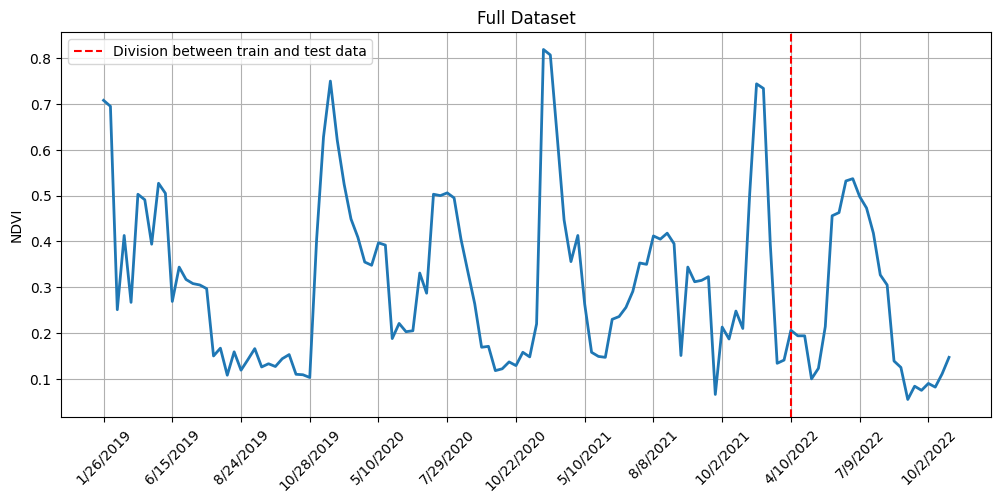

In [ ]:
#Plotting the Full Dataset
fig, ax = plt.subplots(figsize=(12, 5))
index_80_percent = int(len(df) * 0.8)

ax.plot(target_df['NDVI'], linewidth=2)
ax.set_xticks(range(0, len(df['Date'].values), 10))
ax.set_xticklabels(df['Date'].values[::10], rotation=45)
ax.set_ylabel('NDVI') # set the label for the y-axis
ax.set_title('Full Dataset')
ax.axvline(df.index[index_80_percent], 0, 1, label='Division between train and test data', c='r', linestyle='--')
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Dataset
dates = np.array(['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019', '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019', '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019', '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019', '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019', '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019', '10/28/2019'])
ndvi_values = np.array([0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.50, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103])

# Convert dates to datetime objects
dates = np.array([datetime.datetime.strptime(date, "%m/%d/%Y") for date in dates])

# Extract the unique months from the dates
unique_months = np.unique([date.strftime('%b') for date in dates])

# Create an array of y-axis values corresponding to the average NDVI values per month
y_values = np.array([ndvi_values[dates.month == month_num].mean() for month_num in range(1, 13)])

# Plot the dataset
fig, ax = plt.subplots()
ax.plot(unique_months, y_values, marker='o', linestyle='-', label='Average NDVI')
ax.set_xlabel('Month')
ax.set_ylabel('Average NDVI')
ax.set_title('Average NDVI by Month')
ax.legend()
ax.grid(True)
plt.show()


AttributeError: ignored

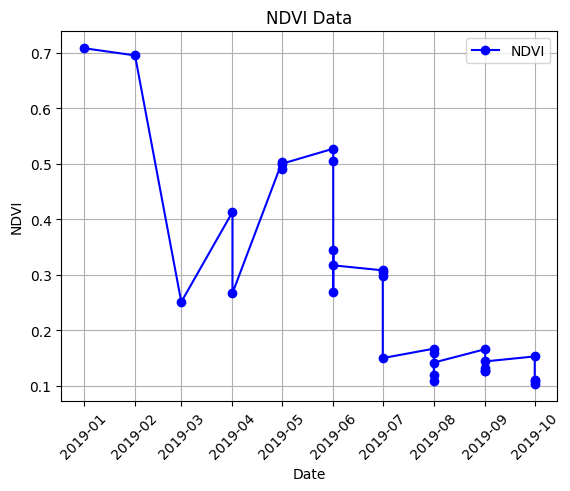

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Dataset
dates = np.array(['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019', '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019', '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019', '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019', '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019', '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019', '10/28/2019'])

ndvi_values = np.array([0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.50, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103])

# Convert dates to datetime objects
dates = np.array([datetime.datetime.strptime(date, "%m/%d/%Y") for date in dates])

# Create an array of x-axis values corresponding to the first day of January, April, July, and October
x = np.array([datetime.datetime(date.year, date.month, 1) for date in dates])

# Plot the dataset
plt.plot(x, ndvi_values, 'bo-', label='NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Data')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
dates = np.array(['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019', '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019', '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019', '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019', '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019', '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019', '10/28/2019'])

#ndvi_values = np.array([0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.50, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103])

# Convert dates to datetime objects
dates = np.array([np.datetime64(date) for date in df['Date'].values])

# Create an array of x-axis values corresponding to the first day of January, April, July, and October
x = np.array([np.datetime64(f"{date.year}-{date.month}-01") for date in dates])

# Plot the dataset
plt.plot(x, target_df['NDVI'], 'bo-', label='NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Data')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


ValueError: ignored

# Splitting

In [ ]:
# Creating Feature and Target with X and y respectively
X = target_df[['NDVI', 'Target']].values[:,:1]
y = target_df[['NDVI', 'Target']].values[:,1:]

In [ ]:
X.shape, y.shape
#((124, 1), (124, 1))

((280, 1), (280, 1))

In [ ]:
# Spliting the data into train(80%) and test(20%) parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)
# Splitting the dates
train_dates = target_df.Date[:int(len(X)*0.80)]
test_dates =  target_df.Date[int(len(X)*0.80):]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#((99, 1), (25, 1), (99, 1), (25, 1))

((224, 1), (56, 1), (224, 1), (56, 1))

# Plotting Training and Testing data

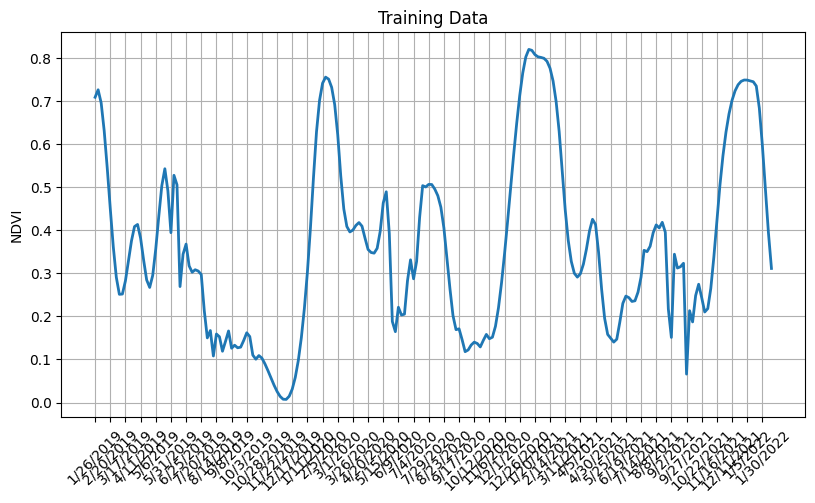

In [ ]:
#Plot Training Data
fig, ax = plt.subplots(figsize=(9.6, 5))
ax.plot(X_train, linewidth=2)

ax.set_xticks(range(0, len(train_dates.values), 5))
ax.set_xticklabels(train_dates.values[::5], rotation=45)

ax.set_title('Training Data')
ax.set_ylabel('NDVI')

ax.grid(True)
plt.show()

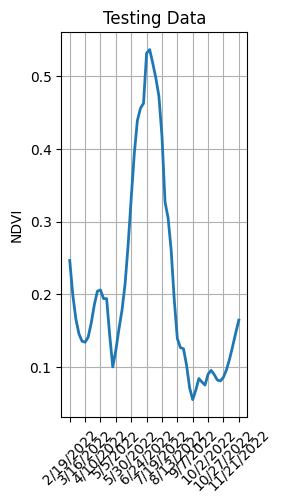

In [ ]:
#Plot Testing Data
fig, ax = plt.subplots(figsize=(2.4, 5))
ax.plot(X_test, linewidth=2)

ax.set_xticks(range(0, len(test_dates.values), 5))
ax.set_xticklabels(test_dates.values[::5], rotation=45)

ax.set_title('Testing Data')
ax.set_ylabel('NDVI') # set the label for the y-axis
ax.grid(True)
plt.show()

# Model

In [ ]:
# # B-spline and Ridge Regression
# # Cubic Spline
# regression_model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
# regression_model.fit(X_train, y_train)

In [ ]:
X_train, y_train

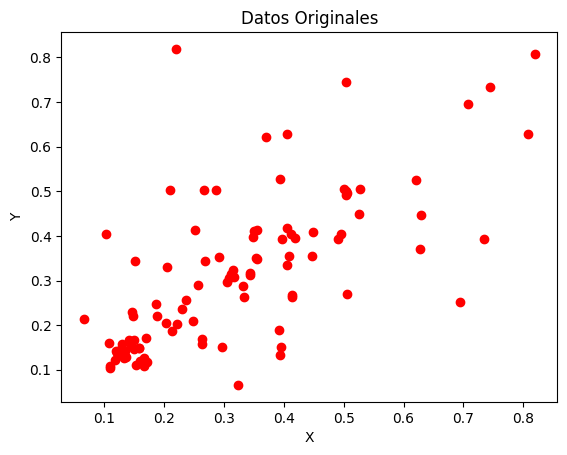

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import SplineTransformer

# Datos de entrada y salida


# Crear el transformador spline y ajustarlo a los datos de entrada y salida
spline = SplineTransformer(n_knots=4, degree=3)
spline.fit(X_train, y_train)

# Graficar los datos originales sin la transformación
plt.scatter(X_train, y_train, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos Originales')
plt.show()


In [ ]:
# B-spline and Ridge Regression
# Cubic Spline
spline = SplineTransformer(n_knots=4, degree=3)
S = spline.fit(X_train, y_train)
S

SplineTransformer(n_knots=4)

In [ ]:
# B-spline and Ridge Regression
# Cubic Spline
regression_model = Ridge(alpha=1e-3)
regression_model.fit(S)

TypeError: ignored

# Predicting

In [ ]:
# Calculate predicted values
y_pred = regression_model.predict(X_test)

# RMSE, MSE, MAE, R2

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Spline R^2 score: ", r2)
print("Spline Root Mean Squared Error (RMSE): ", rmse)
print("Spline Mean Squared Error (MSE): ", mse)
print("Spline Mean Absolute Error (MAE): ", mae)

#RIDGE
# Spline R^2 score:  0.9452155208079925
# Spline Root Mean Squared Error (RMSE):  0.03254568888090853
# Spline Mean Squared Error (MSE):  0.001059221864732893
# Spline Mean Absolute Error (MAE):  0.024683129914422144
#                    0.9452155208079925
# Spline R^2 score:  0.9452272796030657
# Spline Root Mean Squared Error (RMSE):  0.03254219593336898
# Spline Mean Squared Error (MSE):  0.0010589945161657767
# Spline Mean Absolute Error (MAE):  0.02468084236776587

Spline R^2 score:  0.9452272796030657
Spline Root Mean Squared Error (RMSE):  0.03254219593336898
Spline Mean Squared Error (MSE):  0.0010589945161657767
Spline Mean Absolute Error (MAE):  0.02468084236776587


# Plotting prediction dataset TEST

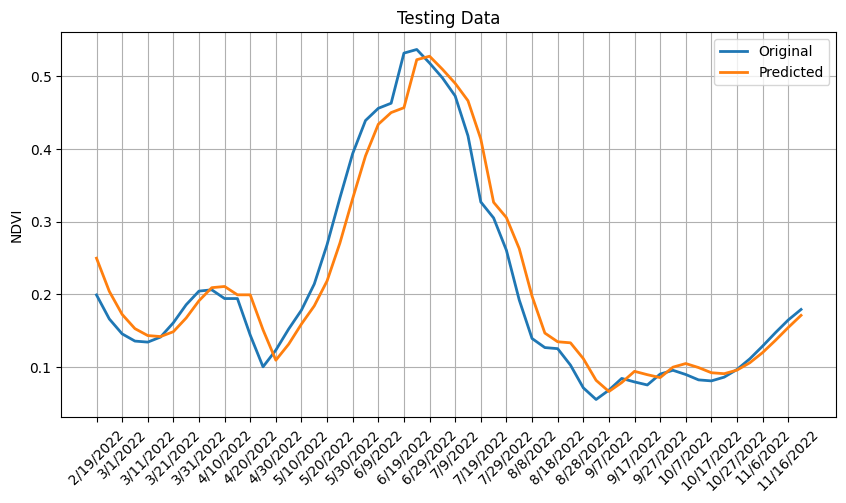

In [ ]:
#Plot Testing Data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_test, linewidth=2, label = 'Original')
ax.plot(y_pred, linewidth=2, label = 'Predicted')
ax.set_xticks(range(0, len(test_dates.values), 2))
ax.set_xticklabels(test_dates.values[::2], rotation=45)

ax.set_title('Testing Data')
ax.set_ylabel('NDVI')
ax.legend()
ax.grid(True)
plt.show()

# probing the transformer

In [ ]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = np.arange(6).reshape(6, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
spline = SplineTransformer(degree=2, n_knots=3)
Z = spline.fit_transform(X)
Z

array([[0.5 , 0.5 , 0.  , 0.  ],
       [0.18, 0.74, 0.08, 0.  ],
       [0.02, 0.66, 0.32, 0.  ],
       [0.  , 0.32, 0.66, 0.02],
       [0.  , 0.08, 0.74, 0.18],
       [0.  , 0.  , 0.5 , 0.5 ]])

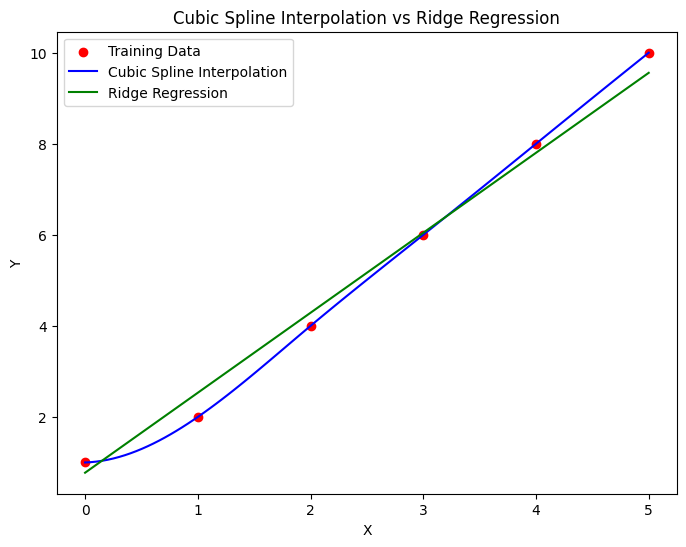

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.linear_model import Ridge

# Training data
X_train = np.array([0, 1, 2, 3, 4, 5])
y_train = np.array([1, 2, 4, 6, 8, 10])

# Create the cubic spline function
cubic_spline = CubicSpline(X_train, y_train)

# Test data
X_test = np.linspace(0, 5, 100)  # Generate evenly spaced points between 0 and 5

# Perform interpolation on test data
y_pred_spline = cubic_spline(X_test)

# Fit a Ridge regression model on the training data
regression_model = Ridge(alpha=1.0)
regression_model.fit(X_train.reshape(-1, 1), y_train)

# Perform Ridge regression prediction on the test data
y_pred_regression = regression_model.predict(X_test.reshape(-1, 1))

# Plot the cubic spline interpolation and ridge regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_test, y_pred_spline, color='blue', label='Cubic Spline Interpolation')
plt.plot(X_test, y_pred_regression, color='green', label='Ridge Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Spline Interpolation vs Ridge Regression')
plt.legend()
plt.show()


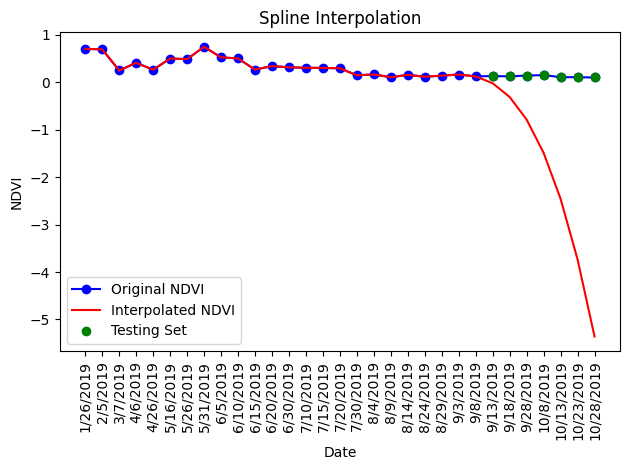

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Dataset
dates = ['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019', '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019', '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019', '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019', '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019', '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019', '10/28/2019']
ndvi_values = [0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.75, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103]

# Convert dates to numerical values
x = np.arange(len(dates))

# Divide the data into training and testing sets
train_ratio = 0.8
train_size = int(len(dates) * train_ratio)

train_dates = x[:train_size]
train_ndvi_values = ndvi_values[:train_size]

test_dates = x[train_size:]
test_ndvi_values = ndvi_values[train_size:]

# Perform spline interpolation on the training data
spline = make_interp_spline(train_dates, train_ndvi_values)
interpolated_values = spline(x)

# Plot the original NDVI values, interpolated values, and testing set values
plt.plot(x, ndvi_values, 'bo-', label='Original NDVI')
plt.plot(x, interpolated_values, 'r-', label='Interpolated NDVI')
plt.plot(test_dates, test_ndvi_values, 'go', label='Testing Set')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Spline Interpolation')
plt.legend()
plt.xticks(x, dates, rotation=90)
plt.tight_layout()
plt.show()


# Good example of spline interpolation finish

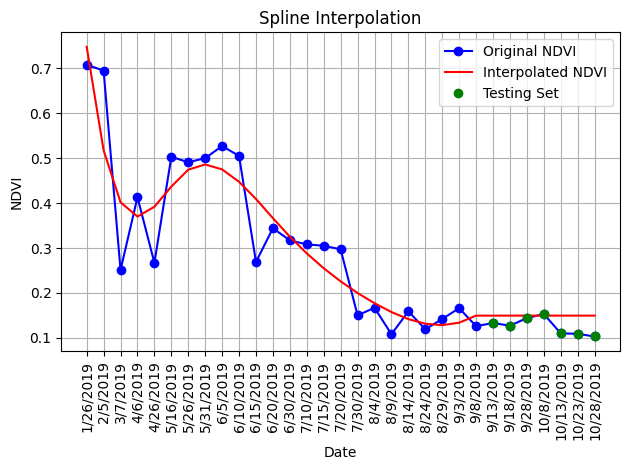

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Dataset
dates = ['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019', '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019', '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019', '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019', '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019', '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019', '10/28/2019']
ndvi_values = [0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.50, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103]

# Convert dates to numerical values
x = np.arange(len(dates))

# Divide the data into training and testing sets
train_ratio = 0.8
train_size = int(len(dates) * train_ratio)

train_dates = x[:train_size]
train_ndvi_values = ndvi_values[:train_size]

test_dates = x[train_size:]
test_ndvi_values = ndvi_values[train_size:]

# Create the pipeline with SplineTransformer and a linear regression model
# Ridge(alpha=1.0)

#regression_model = make_pipeline(SplineTransformer(n_knots=60, degree=3), LinearRegression())
regression_model = make_pipeline(SplineTransformer(n_knots=5
                                                   , degree=3),Ridge(alpha=0.001))

# Fit the model on the training data
regression_model.fit(train_dates.reshape(-1, 1), train_ndvi_values)

# Perform interpolation on the entire dataset
interpolated_values = regression_model.predict(x.reshape(-1, 1))

# Plot the original NDVI values, interpolated values, and testing set values
plt.plot(x, ndvi_values, 'bo-', label='Original NDVI')
plt.plot(x, interpolated_values, 'r-', label='Interpolated NDVI')
plt.plot(test_dates, test_ndvi_values, 'go', label='Testing Set')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Spline Interpolation')
plt.legend()
plt.xticks(x, dates, rotation=90)
plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Dataset
dates = ['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019', '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019', '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019', '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019', '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019', '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019', '10/28/2019']
ndvi_values = [0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.50, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103]

# Convert dates to numerical values
x = np.arange(len(dates))

# Create the pipeline with SplineTransformer and a linear regression model
regression_model = make_pipeline(SplineTransformer(n_knots=5, degree=3), Ridge(alpha=0.001))

# Fit the model on the data
regression_model.fit(x.reshape(-1, 1), ndvi_values)

# Perform interpolation on the entire dataset
interpolated_values = regression_model.predict(x.reshape(-1, 1))

# Create a DataFrame with the dates and interpolated values
df_interpolated = pd.DataFrame({"Date": dates, "Interpolated_NDVI": interpolated_values})

print(df_interpolated)


          Date  Interpolated_NDVI
0    1/26/2019           0.709244
1     2/5/2019           0.542180
2     3/7/2019           0.442179
3     4/6/2019           0.395308
4    4/26/2019           0.387633
5    5/16/2019           0.405221
6    5/26/2019           0.434136
7    5/31/2019           0.460447
8     6/5/2019           0.470605
9    6/10/2019           0.459965
10   6/15/2019           0.432781
11   6/20/2019           0.393694
12   6/30/2019           0.347345
13   7/10/2019           0.298375
14   7/15/2019           0.251426
15   7/20/2019           0.211138
16   7/30/2019           0.181091
17    8/4/2019           0.160613
18    8/9/2019           0.147969
19   8/14/2019           0.141427
20   8/24/2019           0.139251
21   8/29/2019           0.139707
22    9/3/2019           0.141062
23    9/8/2019           0.141620
24   9/13/2019           0.140563
25   9/18/2019           0.137952
26   9/28/2019           0.133884
27   10/8/2019           0.128458
28  10/13/2019

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Dataset
dates = ['1/26/2019', '2/5/2019', '3/7/2019', '4/6/2019', '4/26/2019', '5/16/2019', '5/26/2019', '5/31/2019', '6/5/2019', '6/10/2019', '6/15/2019', '6/20/2019', '6/30/2019', '7/10/2019', '7/15/2019', '7/20/2019', '7/30/2019', '8/4/2019', '8/9/2019', '8/14/2019', '8/24/2019', '8/29/2019', '9/3/2019', '9/8/2019', '9/13/2019', '9/18/2019', '9/28/2019', '10/8/2019', '10/13/2019', '10/23/2019', '10/28/2019']
ndvi_values = [0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.50, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103]


In [ ]:
dates, ndvi_values

(['1/26/2019',
  '2/5/2019',
  '3/7/2019',
  '4/6/2019',
  '4/26/2019',
  '5/16/2019',
  '5/26/2019',
  '5/31/2019',
  '6/5/2019',
  '6/10/2019',
  '6/15/2019',
  '6/20/2019',
  '6/30/2019',
  '7/10/2019',
  '7/15/2019',
  '7/20/2019',
  '7/30/2019',
  '8/4/2019',
  '8/9/2019',
  '8/14/2019',
  '8/24/2019',
  '8/29/2019',
  '9/3/2019',
  '9/8/2019',
  '9/13/2019',
  '9/18/2019',
  '9/28/2019',
  '10/8/2019',
  '10/13/2019',
  '10/23/2019',
  '10/28/2019'],
 [0.708,
  0.695,
  0.251,
  0.413,
  0.267,
  0.503,
  0.491,
  0.5,
  0.527,
  0.505,
  0.269,
  0.344,
  0.317,
  0.308,
  0.305,
  0.297,
  0.15,
  0.167,
  0.108,
  0.159,
  0.119,
  0.142,
  0.166,
  0.126,
  0.133,
  0.127,
  0.144,
  0.153,
  0.11,
  0.109,
  0.103])

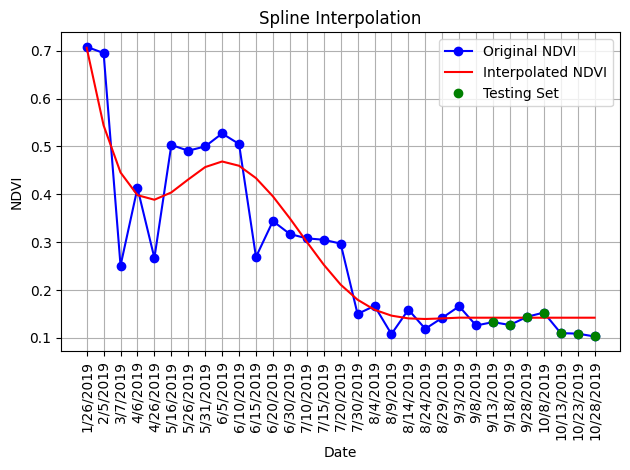

In [ ]:

# Convert dates to numerical values
x = np.arange(len(dates))

# Divide the data into training and testing sets
train_ratio = 0.8
train_size = int(len(dates) * train_ratio)

train_dates = x[:train_size]
train_ndvi_values = ndvi_values[:train_size]

test_dates = x[train_size:]
test_ndvi_values = ndvi_values[train_size:]

# Create the pipeline with SplineTransformer and a linear regression model
# Ridge(alpha=1.0)

#regression_model = make_pipeline(SplineTransformer(n_knots=60, degree=3), LinearRegression())
regression_model = make_pipeline(SplineTransformer(n_knots=4
                                                   , degree=3),Ridge(alpha=0.001))

# Fit the model on the training data
regression_model.fit(train_dates.reshape(-1, 1), train_ndvi_values)

# Perform interpolation on the entire dataset
interpolated_values = regression_model.predict(x.reshape(-1, 1))

# Plot the original NDVI values, interpolated values, and testing set values
plt.plot(x, ndvi_values, 'bo-', label='Original NDVI')
plt.plot(x, interpolated_values, 'r-', label='Interpolated NDVI')
plt.plot(test_dates, test_ndvi_values, 'go', label='Testing Set')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Spline Interpolation')
plt.legend()
plt.xticks(x, dates, rotation=90)
plt.tight_layout()
plt.grid()
plt.show()
